In [103]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("prices.csv")

In [14]:
corr_matrix=data.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [21]:
significance=[]
for i in corr_matrix.columns :
    if(corr_matrix[i].corr(data["Sale Price"] )< 0.5):
        significance.append(i)

In [22]:
data.drop(columns=significance,inplace=True)

In [24]:
def convert(x):
    if x=="Yes":
        return 1
    else:
        return 0

In [26]:
data["Waterfront View"]=data["Waterfront View"].apply(convert)

In [28]:
data.drop(columns=["Waterfront View"],inplace=True)

In [30]:
data.drop(columns=["ID","No of Times Visited","Renovated Year","Zipcode","Latitude","Longitude"],inplace=True)

In [32]:
data.drop(columns=["Date House was Sold"],inplace=True)

In [35]:
dic = {data["Condition of the House"].unique()}

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [36]:
dic={"Bad":1,"Okay":2,"Fair":3,"Good":4,"Excellent":5}

In [38]:
data["Condition of the House"]=data["Condition of the House"].map(dic)

In [60]:
data.dropna(inplace=True)

In [61]:
Y=data["Sale Price"]

In [62]:
X=data.iloc[:,2:]

In [63]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [64]:
model=LinearRegression()

In [65]:
model.fit(x_train,y_train)

LinearRegression()

In [66]:
prediction=model.predict(x_test)

In [83]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,prediction))
print("Mean squared Error :" ,mean_squared_error(y_test,prediction))
print("Coefficients : ",model.coef_)
print("Intercept",model.intercept_)


Mean Absolute Error :  151159.83427721282
Mean squared Error : 61335452879.49347
Coefficients :  [ 3.93288489e+04  1.22826583e+02  6.18160402e-02  5.01678382e+04
  1.64054915e+04  8.08868696e+04  4.99844555e+01  7.28421270e+01
  3.72297624e+03  6.69758243e+01 -4.63357780e-01]
Intercept -960064.2215991833


In [77]:
explainer = shap.Explainer(model,x_test)
shap_values=explainer.shap_values(x_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


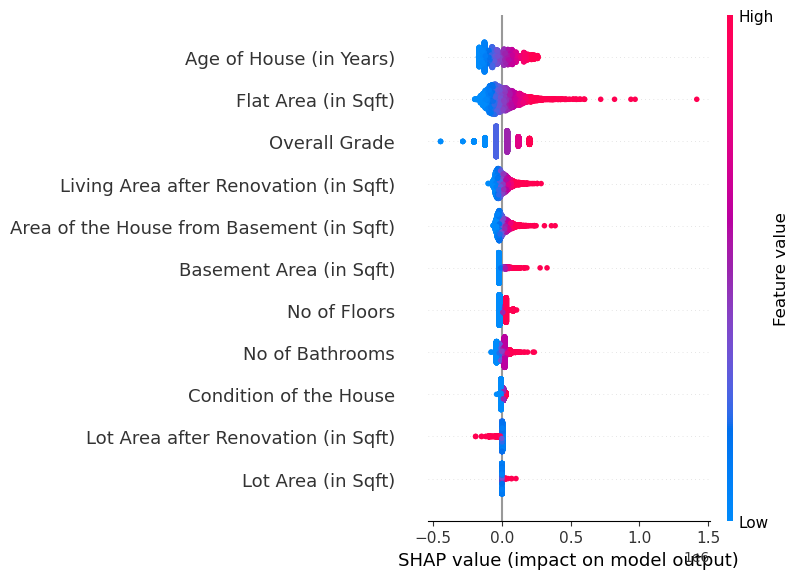

In [78]:
shap.summary_plot(shap_values,x_test)

In [86]:
data

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,5650.0,1.0,3,7,1180.0,0,63,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,3,7,2170.0,400,67,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,3,6,770.0,0,85,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,5,7,1050.0,910,53,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,3,8,1680.0,0,31,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,3,8,1530.0,0,9,1530.0,1509
21609,400000.0,4,2.50,2310.0,5813.0,2.0,3,8,2310.0,0,4,1830.0,7200
21610,402101.0,2,0.75,1020.0,1350.0,2.0,3,7,1020.0,0,9,1020.0,2007
21611,400000.0,3,2.50,1600.0,2388.0,2.0,3,8,1600.0,0,14,1410.0,1287


In [100]:
model1=LinearRegression()
y=np.array(data["Sale Price"])
x=np.array(data["Living Area after Renovation (in Sqft)"])
x=x.reshape(-1,1)


In [101]:
xtr,xtst,ytr,ytst=train_test_split(x,y,test_size=0.2)

xtr=np.array(xtr)
xtr=xtr.reshape(-1,1)


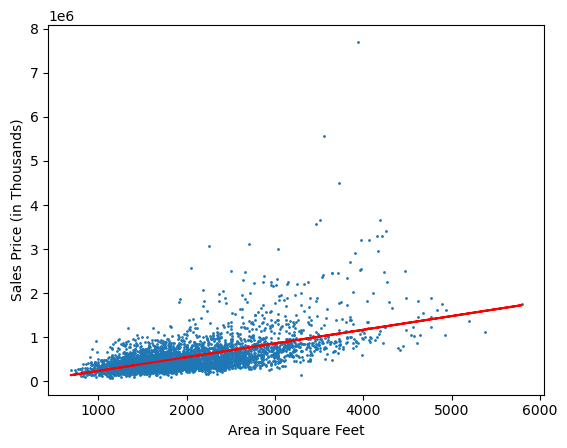

In [108]:
model1.fit(xtr,ytr)
pred=model1.predict(xtst)
plt.plot(xtst,pred,color="red")
plt.scatter(xtst,ytst,s=1)
plt.xlabel("Area in Square Feet")
plt.ylabel("Sales Price (in Thousands)")
plt.show()